<a href="https://colab.research.google.com/github/ajit-gvs/HCR/blob/master/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
print(tf.__version__)


TensorFlow 1.x selected.
1.15.2


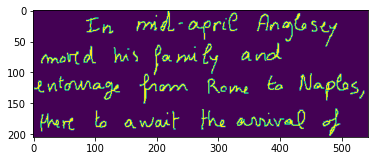

In [68]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_orig=Image.open('iam.png','r')

def image_binarization(image):
  image_grayscale=image.convert('L')
  img=np.array(image_grayscale)
  img[img <128] = 0# white
  img[img >=128] = 254 # black
  img[img==0]=255
  img[img==254]=0
  
  return img
plt.imshow(image_binarization(image_orig))

img=image_binarization(image_orig)




(205, 1)


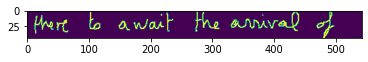

In [70]:
def line_segmentation(img):
  start_matrix=[]
  end_matrix=[]
  dissection_matrix=[]

  horizontal_hist = np.sum(img,axis=1,keepdims=True)/255
  start_count=0
  for i in range(len(horizontal_hist)):
    if horizontal_hist[i]>0 and horizontal_hist[i-1]==0:
      start_count+=1
      start_matrix.append(i)
    if horizontal_hist[i]==0 and start_count>0 and horizontal_hist[i-1]>0:
      end_matrix.append(i)
  print(horizontal_hist.shape)
  for i in range(len(start_matrix)):
    dissection_matrix.append([start_matrix[i],end_matrix[i]])
  return dissection_matrix
line_segmentation(image_orig)
img=image_binarization(image_orig)
plt.imshow(img[159:203])







In [96]:

def word_segmentation(img):
  start_matrix=[]
  end_matrix=[]
  dissection_matrix=[]
  
  length=[]
  vertical_hist = np.sum(img,axis=0,keepdims=True)/255
  
  
  start_count=0
  print(len(vertical_hist))
  
  for i in range(len(vertical_hist[0])):
    if vertical_hist[0][i]>0 and vertical_hist[0][i-1]==0:
      start_count+=1
      start_matrix.append(i)
    if vertical_hist[0][i]==0 and start_count>0 and vertical_hist[0][i-1]>0:
      end_matrix.append(i)
  
  
  length_mag=0
  for i in range(len(start_matrix)):
    if i>0:
      length_mag=(start_matrix[i]-end_matrix[i-1])
      length.append(length_mag)

  max=np.max(length)
  min=np.min(length)    
  mean=length_mag/(len(start_matrix)-1)
  avg=max/3
  dissection_matrix.append([start_matrix[0],end_matrix[0]])
  j=0
  for i in range(len(length)):
    
    if length[i]> avg:
      dissection_matrix.append([start_matrix[i+1],end_matrix[i+1]])
      j+=1
      
    if length[i]<=avg:
      dissection_matrix[j][1]=end_matrix[i+1]
      
  print(start_matrix)
  print(length)
  
  
  print(end_matrix)
 
  
  print(dissection_matrix)
  return dissection_matrix
word_segmentation(img[159:203])


1
[12, 48, 101, 148, 173, 198, 226, 273, 284, 330, 469]
[5, 34, 29, 6, 2, 4, 36, 1, 18, 28]
[43, 67, 119, 167, 196, 222, 237, 283, 312, 441, 498]
[[12, 67], [101, 119], [148, 237], [273, 312], [330, 441], [469, 498]]


[[12, 67], [101, 119], [148, 237], [273, 312], [330, 441], [469, 498]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  


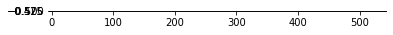

In [74]:
img1=img[159:203]
plt.imshow(img1[:][101:119])